# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [83]:
import io
import requests
import ssl
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [15]:
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [17]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

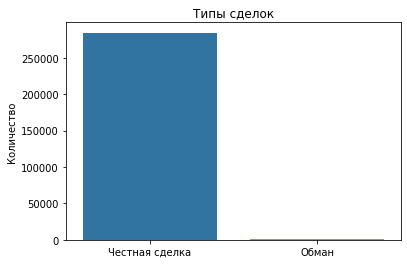

In [33]:
objects = ('Честная сделка', 'Обман')
y_pos = np.arange(len(objects))
performance = [len(dataset[dataset['Class']==0]), len(dataset[dataset['Class']==1])]
sns.barplot(y_pos, performance)
plt.xticks(y_pos, objects)
plt.ylabel('Количество')
plt.title("Типы сделок")
plt.show()

In [45]:
print(f'Количество честных сделок {len(dataset[dataset["Class"]==0])}\nКоличество обманных сделок {len(dataset[dataset["Class"]==1])}')

Количество честных сделок 284315
Количество обманных сделок 492



**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [50]:
print(f'Объём денег в честных операциях {round(sum(dataset[dataset["Class"]==0]["Amount"]),2)}\nОбъём денег в обманных операциях {round(sum(dataset[dataset["Class"]==1]["Amount"]),2)}')

Объём денег в честных операциях 25102462.04
Объём денег в обманных операциях 60127.97


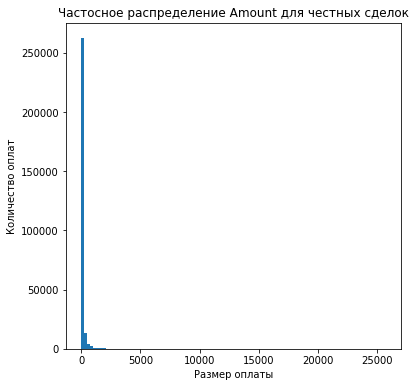

In [76]:
plt.figure(figsize=(6,6))
plt.hist(dataset[dataset['Class']==0]['Amount'], 100)
plt.xlabel("Размер оплаты")
plt.ylabel("Количество оплат")
plt.title("Частосное распределение Amount для честных сделок")
plt.show()

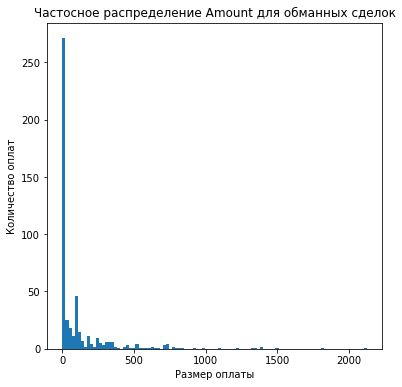

In [75]:
plt.figure(figsize=(6,6))
plt.hist(dataset[dataset['Class']==1]['Amount'], 100)
plt.xlabel("Размер оплаты")
plt.ylabel("Количество оплат")
plt.title("Частосное распределение Amount для обманных сделок")
plt.show()

**5. Построить графики histograms для всех значений**

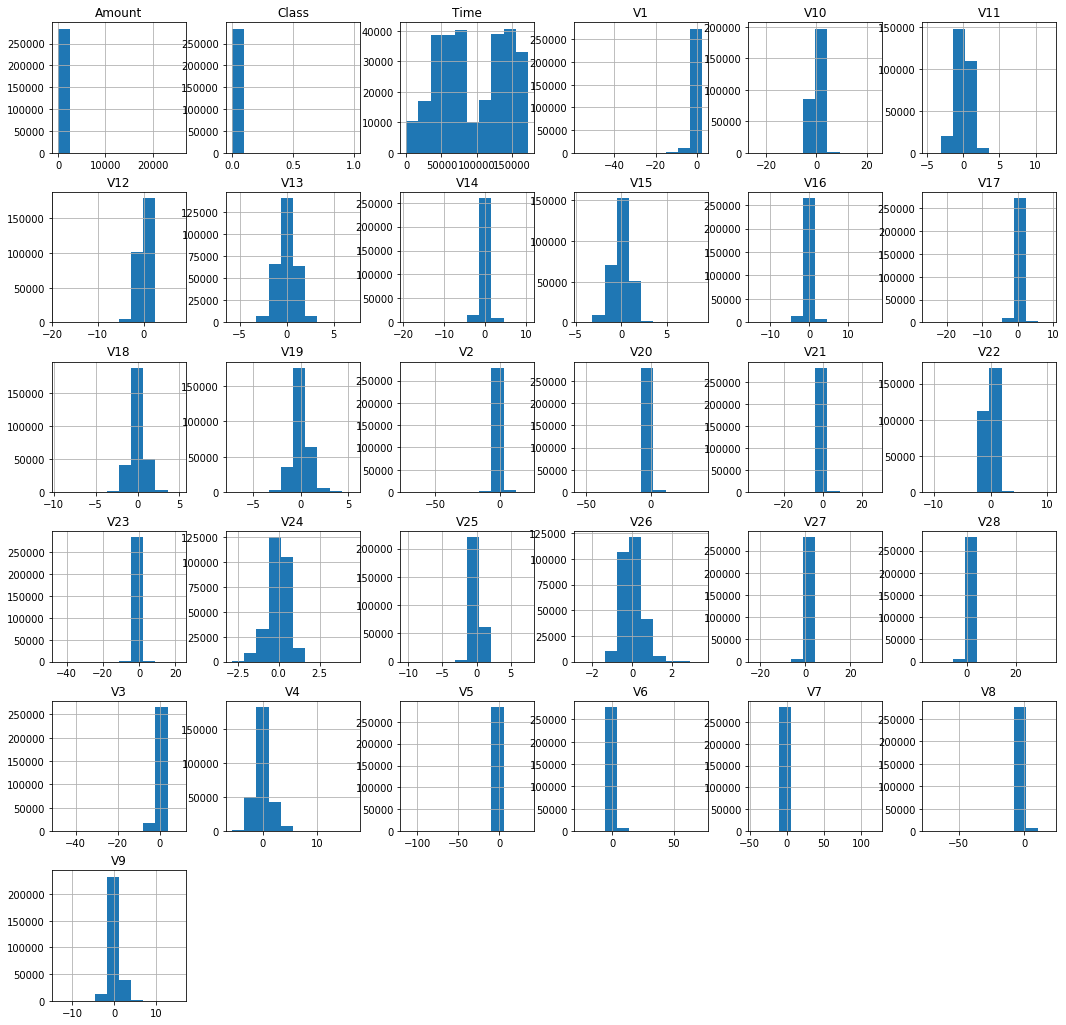

In [81]:
dataset.hist(figsize=(18,18))
plt.show()

**6. Построить матрицу корреляций для всех значений**

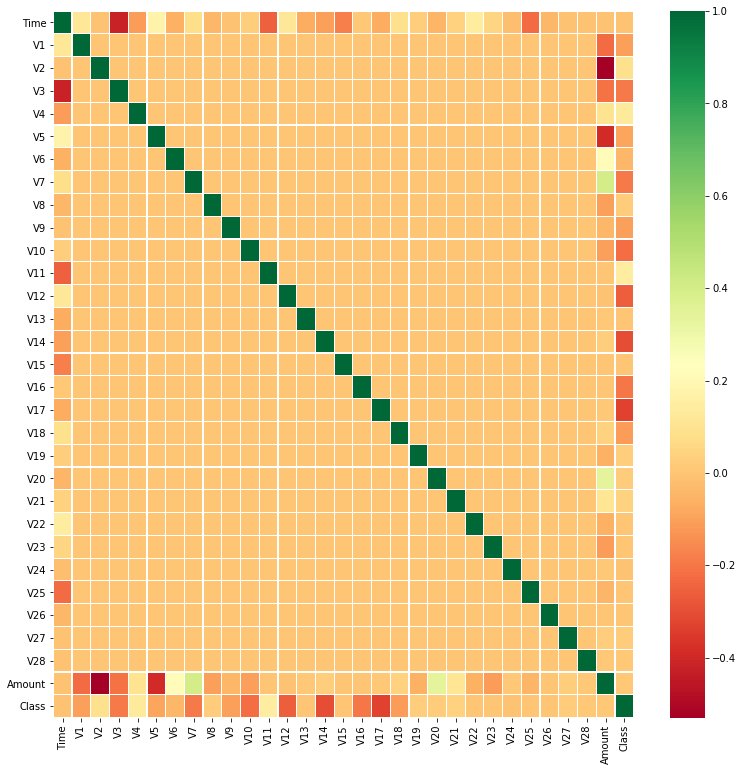

In [84]:
headers = list(dataset.columns.values)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(dataset)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()
df_norm.columns = headers
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [96]:
output_y = dataset.iloc[:,29:]
input_x = dataset.iloc[:,:29]

In [97]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

Amount    284428
Class        379
dtype: int64


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, Y, test_size=0.3)

Модель Random Forest

In [99]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

KeyboardInterrupt: 

Как делать classification report:

In [ ]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**